# Planning a telescope observation


Let's build your first Markov Chain! 

You are a real astronomer (not a theory guy like me) and are planning an expensive observational campaign. You want to know how likely it is that tomorrow night will be clear given the weather tonight (clear or cloudy). The key piece of information here is that the **weather tomorrow depends on the weather today**. From past history, you know that:

$$p({\rm clear \; tomorrow} \, |\,  {\rm cloudy \; today}) = 0.5,$$

which means that

$$p({\rm cloudy \; tomorrow} \, |\, {\rm cloudy \; today}) = 0.5.$$

We also have

$$p({\rm cloudy \; tomorrow} \, |\, {\rm clear \; today}) = 0.1,$$

which means that

$$p({\rm clear \; tomorrow} \, |\, {\rm clear \; today}) = 0.9.$$

- We can start with the sky conditions today and make predictions going forward more and more into the future.
- This will look like a big decision tree. 
- After enough days, we'll reach equilibrium probabilities that have to do with the mean weather statistics (ignoring seasons) and we'll arrive at

$$p({\rm clear}) = 0.83,$$

and 

$$p({\rm cloudy}) = 0.17.$$

You get the same answer for day $N$ as day $N+1$ and it doesn't matter whether it was clear or cloudy on the day that you started. The steps that we have taken in this process are, indeed, a **MARKOV CHAIN**.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
import astroML.stats
import numpy as np

### a)

- Start off on a cloud day or sun day.
- Implement your weather forecast based on the above probabilities
- Run your simulator for N days (with  𝑁≳104)

--------------------------------------------------------------------------------------------------------------------------------
I set:
- 1 : clear day
- 0 : cloudy day
 
--------------------------------------------------------------------------------------------------------------------------------

In [2]:
N = 10000 #Number of days 

#It is an array (weather = []), which has the first valueo equal to 0 or  equal to 1. This is possible due to "np.random.choice"
weather = [np.random.choice(np.array([0, 1]))] 

for i in range(N-1):

    p = random.uniform(0,1)


    if weather[i-1] == 0:
        if p <= 0.5:
            weather.append(0) 
        else:
            weather.append(1)   
    else:
        if p <= 0.1:
            weather.append(0)
        else:
            weather.append(1)

print("p(clear) = ",weather.count(1)/N)
print("p(cloudy) = ",weather.count(0)/N)

#np.array will transform a list ("weather") into array
weather = np.array(weather)

p(clear) =  0.8372
p(cloudy) =  0.1628


### b)

- Prepare a plot with the number of days on the x axis and the cumulative fraction of, say, sunny days over the number of days so far on the y axis. This is called a trace-plot, showing how our estimate of  𝑝(clear) evolves as the chain samples.

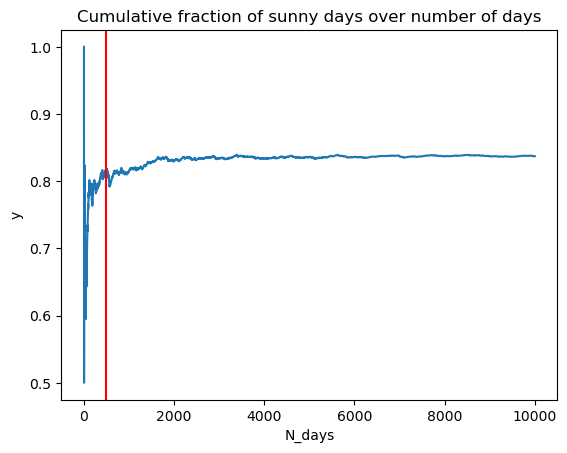

In [3]:
N_days = np.array([i for i in range(1,N+1)])
# y is cumulative fraction of sunny days over number of days
y = np.cumsum(weather)/N_days 

plt.plot(N_days, y)
plt.axvline(x = 500, color= 'red')

plt.title("Cumulative fraction of sunny days over number of days")
plt.xlabel("N_days")
plt.ylabel("y")
plt.show()

### c)
- Prepare a histogram of the above plot. This reveals the distribution of  𝑝(clear).

Text(0, 0.5, 'p(clear) distribution')

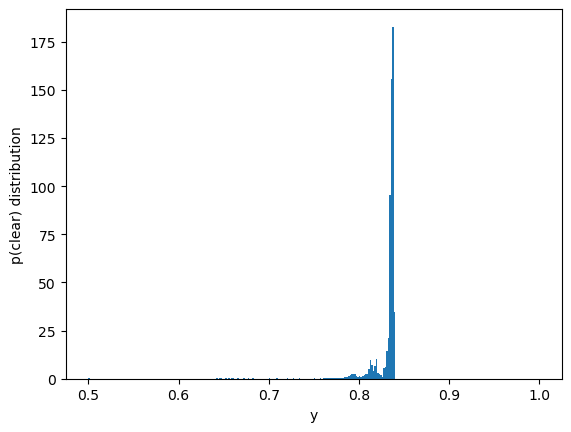

In [4]:
plt.hist(y, bins= 300, density = True);
plt.xlabel("y")
plt.ylabel("p(clear) distribution")

### d)
- Use a summary statistics to determine the most likely value and an error on our estimate.

In [5]:
print("Median = ",np.median(y))
print("sigma_G =",astroML.stats.sigmaG(y))

Median =  0.8358109788475183
sigma_G = 0.002572234044547461


----
**NOTE**
- In MCMC the process must be **stationary** which basically means that the chain statistics look the same no matter which chunk you look at, e.g. first half, second half, or every other point, etc.  
- Obviously that isn't going to be the case in the early steps of the chain. In our example above, after some time the process was stationary, but not in the first few days.
- So, there is a **burn-in** phase that needs to be discarded. How one determines the number of early steps to discard as burn-in is tricky, but ***you should always start with a traceplot of your samples!***
----

### e)
- In the above example, experiment with chopping off different numbers of initial points as burn-in.

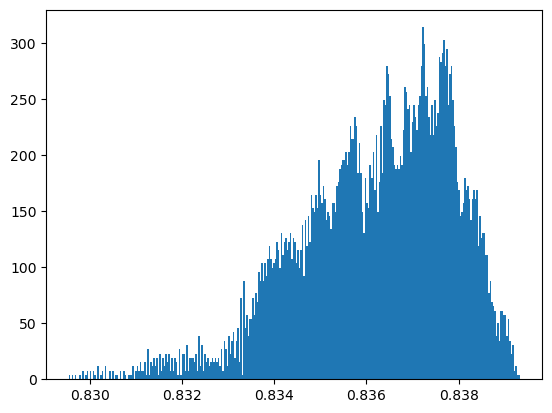

In [6]:
# y[2000:] give me the last 8000 value of y array
new_y = y[2000:]
plt.hist(new_y,bins= 300, density = True);

#\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/#
#These code lines are the same of the above one.
#
#N_days = np.array([i for i in range(2000,N+2000)])
#y = np.cumsum(weather)/N_days 
#plt.hist(y, bins= 300, density = True);
#\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/#

In [7]:
print("Median = ",np.median(new_y))
print("sigma_G =",astroML.stats.sigmaG(new_y))

Median =  0.8364517601805737
sigma_G = 0.0017816805390843608
